In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd

In [2]:
with open('config.yml', encoding = 'utf-8') as f:
    configs = yaml.load(f, Loader = yaml.FullLoader)

In [3]:
with open('bairros.yml', encoding = 'utf-8') as f:
    ids = yaml.load(f, Loader = yaml.FullLoader)

In [4]:
bairros = np.load('geoloc_Bairros_MRJ.npy')

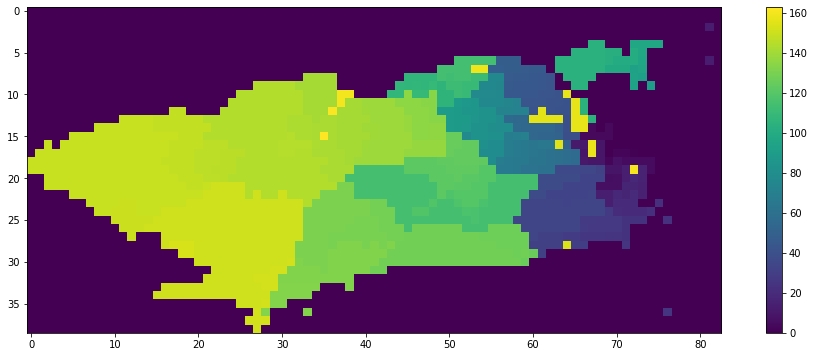

In [5]:
plt.figure(figsize=(16,6))
plt.imshow(bairros, interpolation='none')
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
8//3, 8%3

(2, 2)

In [7]:
bairros[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 151., 151., 151., 152., 133., 133.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.])

In [8]:
ids['id_bairros'][151]

'GUARATIBA'

In [50]:
def set_df(fonte, **kwargs):
    """Carrega o CSV com dados do covid para determinada cidade ou estado e retorna um pandas.DataFrame com os dados

    Parameters
    ----------
    fonte : str ('prefeitura_rj', 'estado_rj')
        Indica qual a fonte dos dados, com isso a função determina qual CSV carregar e como tratar o DataFrame.
        O arquivo a ser carregado é dado em configs.yml
    *args : dict, optional
        Um dicionário com argumentos extras:
            df_break: Se setado para True, muda o retorno para vários DataFrames
    Returns
    -------
    ret_v: Se nenhum argumento opcional for passado, ret_v é uma lista contendo o DataFrame tratado com todos os casos, e a data de atualização dos dados
            df_break == True: ret_v é uma lista com [DataFrame Tratado, [DataFrame Ativos, DataFrame Recuperados, DataFrame Obitos], Data de Atualização]        
    """

    if fonte == 'prefeitura_rj':
        df = pd.read_csv('Dados_indiv_MRJ_covid19_20200516.csv', encoding = 'iso-8859-1', delimiter = ';')
        df.rename(columns = configs['df']['rename']['rj']['colunas']['prefeitura'], inplace = True)
        dt_att = df['Data_atualização'].values[0]
        for drop in configs['df']['droppable']['rj']['prefeitura']:
            df.drop(drop, axis = 1, inplace = True)
        for r in configs['df']['rename']['rj']['dados']['prefeitura']:
            df[r].replace(configs['df']['rename']['rj']['dados']['prefeitura'][r], inplace = True)
        if 'df_break' in kwargs  and kwargs['df_break'] == True:
            df_break = []
            for s in configs['df']['status']['rj']['prefeitura']:
                df_break.append(df[df['Evolucao'] == s])
            ret_lst = [df, df_break, dt_att]
        else:
            ret_lst = [df, dt_att]
    elif fonte == 'estado_rj':
        df = pd.read_csv(root_dir + '/' + configs['csv']['rj']['file_loc']['estado'])
        df = df[df['classificacao'] == 'CONFIRMADO']
        df.rename(columns = configs['df']['rename']['rj']['colunas']['estado'], inplace = True)
        for drop in configs['df']['droppable']['rj']['estado']:
            df.drop(drop, axis = 1, inplace = True)
        for r in configs['df']['rename']['rj']['dados']['estado']:
            df[r].replace(configs['df']['rename']['rj']['dados']['estado'][r], inplace = True)
        df['Municipio'] = [m.title()  for m in df['Municipio']]
        if args and args[0]['df_break'] == True:
            df_break = []
            for s in configs['df']['status']['rj']['estado']:
                df_break.append(df[df['Evolucao'] == s])
            ret_lst = [df, df_break]
        else:
            ret_lst = df
    else: 
        print('Fonte de dados Inválida, as opções são prefeitura_rj ou estado_rj')
        ret_lst = 'Error'
    return ret_lst

In [51]:
df = set_df('prefeitura_rj', df_break = True)

In [52]:
df_atv = df[1][0]

In [53]:
df_atv

,Data,DataSintomas,Bairro,AP,Sexo,FaixaEtaria,Evolucao
2,06/05/2020,05/05/2020,TIJUCA,2.2,M,De 80 a 89,Ativo
7,15/04/2020,06/04/2020,LARANJEIRAS,2.1,M,De 80 a 89,Ativo
17,15/05/2020,14/05/2020,CURICICA,4.0,M,De 50 a 59,Ativo
26,15/05/2020,06/05/2020,COPACABANA,2.1,F,De 60 a 69,Ativo
32,15/05/2020,08/05/2020,SEPETIBA,5.3,M,De 50 a 59,Ativo
...,...,...,...,...,...,...,...
12008,43958,43953,PIEDADE,3.2,M,De 60 a 69,Ativo
12088,43953,43953,ROCHA MIRANDA,3.3,F,De 40 a 49,Ativo
12167,43957,43953,PADRE MIGUEL,5.1,M,De 60 a 69,Ativo
12217,43956,43953,PADRE MIGUEL,5.1,F,De 50 a 59,Ativo


In [54]:
len(df_atv[df_atv['Bairro'] == 'GUARATIBA'])

8

In [55]:
def count_estado_bairro(df,ids):
    n = [0]
    for i in range(1,164):
        n.append(len(df[df['Bairro'] == ids[i]]))
    dic = {ids[i]: n[i] for i in range(1,164)}
    indef = len(df[df['Bairro'] == 'INDEFINIDO'])
    return dic, indef

In [72]:
dic_infectados, n_indef = count_estado_bairro(df_atv, ids['id_bairros'])

In [73]:
dic_infectados

{'SAUDE': 0,
 'GAMBOA': 0,
 'SANTO CRISTO': 1,
 'CAJU': 0,
 'CENTRO': 11,
 'CATUMBI': 4,
 'RIO COMPRIDO': 7,
 'CIDADE NOVA': 0,
 'ESTACIO': 0,
 'SAO CRISTOVAO': 3,
 'MANGUEIRA': 2,
 'BENFICA': 8,
 'PAQUETA': 0,
 'SANTA TERESA': 1,
 'FLAMENGO': 17,
 'GLORIA': 2,
 'LARANJEIRAS': 12,
 'CATETE': 1,
 'COSME VELHO': 2,
 'BOTAFOGO': 21,
 'HUMAITA': 6,
 'URCA': 0,
 'LEME': 2,
 'COPACABANA': 48,
 'IPANEMA': 7,
 'LEBLON': 30,
 'LAGOA': 8,
 'JARDIM BOTANICO': 7,
 'GAVEA': 3,
 'VIDIGAL': 0,
 'SAO CONRADO': 2,
 'PRACA DA BANDEIRA': 4,
 'TIJUCA': 25,
 'ALTO DA BOA VISTA': 0,
 'MARACANA': 3,
 'VILA ISABEL': 7,
 'ANDARAI': 6,
 'GRAJAU': 6,
 'MANGUINHOS': 6,
 'BONSUCESSO': 9,
 'RAMOS': 7,
 'OLARIA': 3,
 'PENHA': 5,
 'PENHA CIRCULAR': 4,
 'BRAS DE PINA': 2,
 'CORDOVIL': 5,
 'PARADA DE LUCAS': 2,
 'VIGARIO GERAL': 4,
 'JARDIM AMERICA': 3,
 'HIGIENOPOLIS': 1,
 'JACARE': 3,
 'MARIA DA GRACA': 0,
 'DEL CASTILHO': 1,
 'INHAUMA': 2,
 'ENGENHO DA RAINHA': 3,
 'TOMAS COELHO': 4,
 'SAO FRANCISCO XAVIER': 2,
 'RO

In [58]:
ids['bairros_id']['SAUDE']

1

In [59]:
np.shape(np.where(bairros == 151)[1])[0]

174

In [60]:
bairros[21][22]

151.0

In [74]:
def aloca_estado_bairro(dic_estado, n_indef, mtrx_bairros, ids):
    mtrx_estado = np.zeros(np.shape(mtrx_bairros))
    for b,qt in dic_estado.items():
        id_b = ids[b]
        local = np.where(mtrx_bairros == id_b)
        n_blocos = np.shape(local)[1]
        qt_por_bloco = qt//n_blocos
        qt_por_bloco_resto = qt%n_blocos
        for i in range(n_blocos):
            mtrx_estado[local[0][i],local[1][i]] = qt_por_bloco
        if qt_por_bloco_resto > 0:
            rng = np.arange(len(local[0]))
            escolha = np.random.choice(rng,qt_por_bloco_resto)
            for e in escolha:
                mtrx_estado[local[0][e],local[1][e]] += 1
    if n_indef > 0:
        existe_bairro = np.where(mtrx_bairros > 0)
        rng = np.arange(len(existe_bairro[0]))
        escolha = np.random.choice(rng, n_indef)
        for e in escolha:
            mtrx_estado[existe_bairro[0][e], existe_bairro[1][e]] += 1
    return mtrx_estado

In [75]:
infect = aloca_estado_bairro(dic_infectados, n_indef, bairros, ids['bairros_id'])

In [76]:
np.sum(infect)

841.0

In [64]:
1521*8

12168

In [65]:
ntf_infect = infect*8

In [66]:
np.sum(ntf_infect)

6728.0

In [67]:
np.sum(infect/np.sum(infect))

1.0

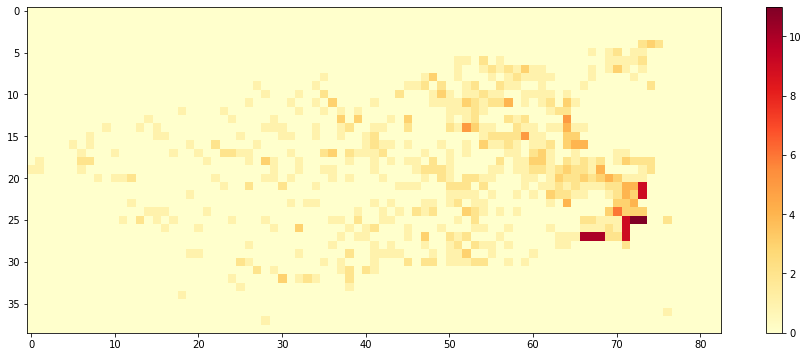

In [68]:
plt.figure(figsize=(16,6))
plt.imshow(infect, interpolation='none', cmap = 'YlOrRd')
plt.colorbar()
plt.grid(False)
plt.show()

In [69]:
np.sum(infect)

841.0

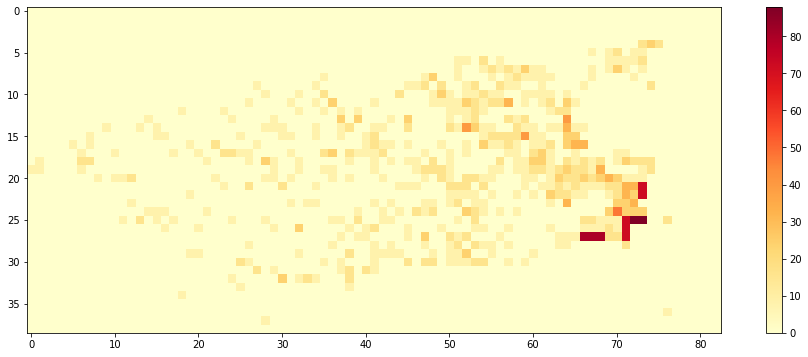

In [70]:
plt.figure(figsize=(16,6))
plt.imshow(ntf_infect, interpolation='none', cmap = 'YlOrRd')
plt.colorbar()
plt.grid(False)
plt.show()

In [71]:
np.save('infectados_1605',infect)

In [51]:
df_rec = df[1][1]

In [52]:
dic_rec, n_rec = count_estado_bairro(df_rec, ids['id_bairros'])

In [53]:
rec = aloca_estado_bairro(dic_rec, n_rec, bairros, ids['bairros_id'])

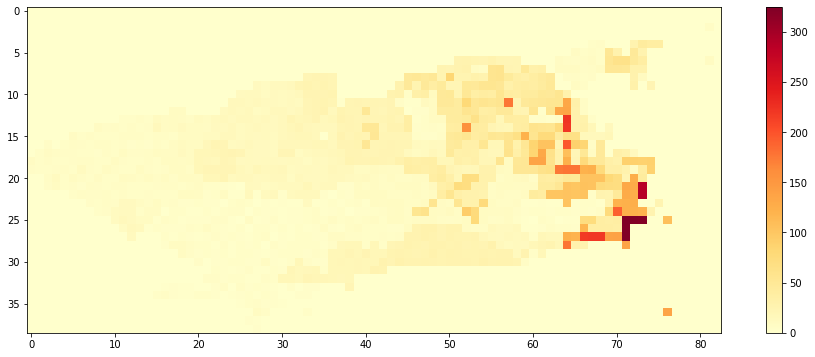

In [54]:
plt.figure(figsize=(16,6))
plt.imshow(rec, interpolation='none', cmap = 'YlOrRd')
plt.colorbar()
plt.grid(False)
plt.show()

In [55]:
df_obt = df[1][2]

In [56]:
dic_obt, n_ind_obt = count_estado_bairro(df_obt, ids['id_bairros'])

In [57]:
obt = aloca_estado_bairro(dic_obt, n_ind_obt, bairros, ids['bairros_id'])

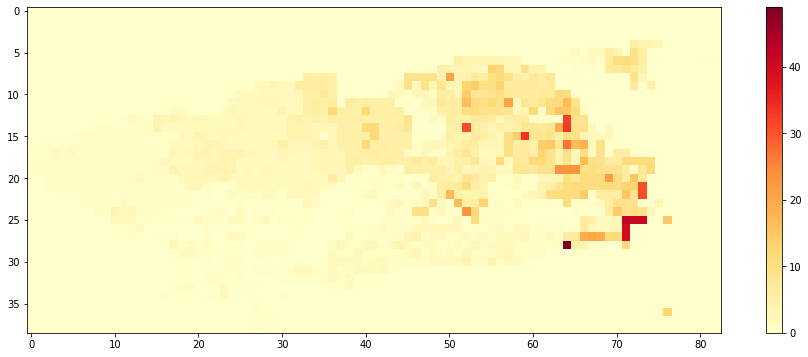

In [58]:
plt.figure(figsize=(16,6))
plt.imshow(obt, interpolation='none', cmap = 'YlOrRd')
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
lst_bairros = list(set(df_atv['Bairro']))

In [35]:
qt = []
bair = []
dic_novo = {}
for b in lst_bairros:
    qt.append(len(df_atv[df_atv['Bairro'] == b]))
    bair.append(b)
    dic_novo[b] = len(df_atv[df_atv['Bairro'] == b])

In [36]:
dic_novo

{'LINS DE VASCONCELOS': 4,
 'LEBLON': 20,
 'SEPETIBA': 10,
 'CENTRO': 10,
 'ANIL': 13,
 'CACHAMBI': 11,
 'BENFICA': 7,
 'PEDRA DE GUARATIBA': 2,
 'PENHA': 10,
 'DEODORO': 1,
 'ITANHANGA': 7,
 'ENCANTADO': 2,
 'AGUA SANTA': 1,
 'VILA KOSMOS': 2,
 'MANGUINHOS': 4,
 'RECREIO DOS BANDEIRANTES': 37,
 'VARGEM PEQUENA': 1,
 'LARANJEIRAS': 16,
 'CURICICA': 7,
 'BOTAFOGO': 30,
 'CORDOVIL': 1,
 'CAMPINHO': 6,
 'FLAMENGO': 28,
 'QUINTINO BOCAIUVA': 5,
 'TIJUCA': 60,
 'INHAUMA': 6,
 'TAUA': 2,
 'LEME': 1,
 'SANTISSIMO': 11,
 'PARADA DE LUCAS': 3,
 'IRAJA': 18,
 'ACARI': 2,
 'DEL CASTILHO': 5,
 'CIDADE UNIVERSITARIA': 1,
 'GALEAO': 7,
 'ROCHA MIRANDA': 12,
 'RICARDO ALBUQUERQUE': 7,
 'TAQUARA': 25,
 'JACAREPAGUA': 34,
 'SAO CONRADO': 11,
 'ABOLICAO': 4,
 'PADRE MIGUEL': 8,
 'COELHO NETO': 8,
 'JARDIM SULACAP': 5,
 'VIDIGAL': 2,
 'TODOS OS SANTOS': 10,
 'CAVALCANTE': 1,
 'ALTO DA BOA VISTA': 3,
 'SAO FRANCISCO XAVIER': 3,
 'VILA MILITAR': 1,
 'VILA ISABEL': 13,
 'CASCADURA': 3,
 'COSMOS': 15,
 'IPAN

In [37]:
np.sum([v for i,v in dic_infectados.items()])

1430

In [38]:
np.sum([v for i,v in dic_novo.items()])

1542

In [39]:
np.sum(qt)

1542

In [40]:
np.sum([v for i,v in dic_infectados.items()])

1430

In [41]:
n = [0]
for i in range(1,164):
    n.append(len(df_atv[df_atv['Bairro'] == ids['id_bairros'][i]]))

In [42]:
bool_bair = [v not in ids['bairros_id'] for v in lst_bairros]

In [43]:
rng_b = np.arange(len(bool_bair))

In [44]:
rng_b[bool_bair]

array([ 65, 131])

In [45]:
lst_bairros[24]

'TIJUCA'

In [57]:
n_indef

91

In [59]:
infectados = np.zeros((39,83))

In [60]:
existe_bairro = np.where(bairros > 0)
rng = np.arange(len(existe_bairro[0]))
escolha = np.random.choice(rng, n_indef)
for e in escolha:
    infectados[existe_bairro[0][e], existe_bairro[1][e]]

In [67]:
existe_bairro[0][1]

21 49
14 50
33 28
23 68
17 28
32 32
25 58
4 68
10 56
11 42
26 65
31 29
25 11
30 40
25 76
16 58
15 43
22 39
32 38
21 46
17 61
25 20
29 54
23 9
10 53
30 32
16 4
31 27
28 26
18 14
24 69
23 66
7 55
14 37
15 66
14 39
13 39
19 20
29 60
14 39
27 21
14 30
28 41
31 35
21 29
26 71
21 61
7 63
18 52
30 41
14 42
16 4
8 46
9 56
19 61
10 36
8 64
12 24
10 51
25 21
10 35
31 32
30 33
10 54
29 59
15 35
20 8
14 28
25 60
15 58
24 69
12 42
12 45
11 34
21 52
14 10
22 38
17 37
16 57
23 44
16 66
19 57
16 17
30 36
21 23
19 33
27 54
19 12
18 33
24 55
18 10


In [68]:
infectados[18,10]

0.0

In [63]:
escolha

array([ 834,  344, 1432,  989,  521, 1413, 1110,    2,  147,  174, 1181,
       1388, 1063, 1361, 1126,  483,  401,  893, 1419,  831,  554, 1072,
       1333,  930,  144, 1353,  429, 1386, 1255,  579, 1056,  987,   41,
        331,  424,  333,  273,  660, 1339,  333, 1194,  324, 1270, 1394,
        814, 1187,  846,   48,  617, 1362,  336,  429,   64,  109,  701,
        131,   81,  202,  142, 1073,  130, 1391, 1354,  145, 1338,  393,
        721,  322, 1112,  416, 1056,  220,  223,  166,  837,  304,  892,
        530,  482,  965,  491,  697,  442, 1357,  808,  673, 1227,  652,
        598, 1042,  575])

In [62]:
np.max(infectados)

0.0